**Utilizando Regressao Linear para previsao de preco da acao da Nvidia**

Para esse estudo foi utilizado um Dataset contendo informacoes da acao da Nvidia dos anos de 2015-2024.







**Importando as bibliotecas**

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

**Carregando os dados**

In [4]:
df = pd.read_csv('/content/nvidia_stock_2015_to_2024.csv')

In [5]:
df.head()

,Unnamed: 0,date,open,high,low,close,adjclose,volume
0,0,2015-01-02,0.50325,0.50700,0.49525,0.50325,0.483218,113680000
1,1,2015-01-05,0.50325,0.50475,0.49250,0.49475,0.475056,197952000
2,2,2015-01-06,0.49550,0.49600,0.47925,0.47975,0.460654,197764000
3,3,2015-01-07,0.48325,0.48750,0.47700,0.47850,0.459453,321808000
4,4,2015-01-08,0.48400,0.49950,0.48375,0.49650,0.476737,283780000


**Limpando o Dataset**

In [11]:
df = df.drop(columns = ['date'], axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2369 non-null   float64
 1   high    2369 non-null   float64
 2   low     2369 non-null   float64
 3   close   2369 non-null   float64
 4   volume  2369 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 92.7 KB


**Correlacao entre as variaveis**

In [13]:
print(df.corr())

            open      high       low     close    volume
open    1.000000  0.999835  0.999757  0.999494  0.008251
high    0.999835  1.000000  0.999764  0.999746  0.011286
low     0.999757  0.999764  1.000000  0.999822  0.004518
close   0.999494  0.999746  0.999822  1.000000  0.007571
volume  0.008251  0.011286  0.004518  0.007571  1.000000


<Axes: >

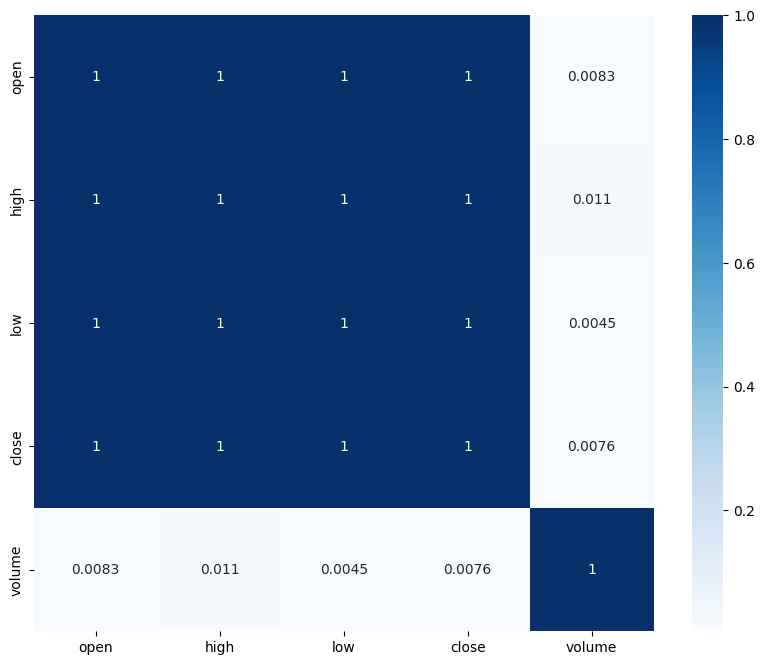

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Blues', annot=True)

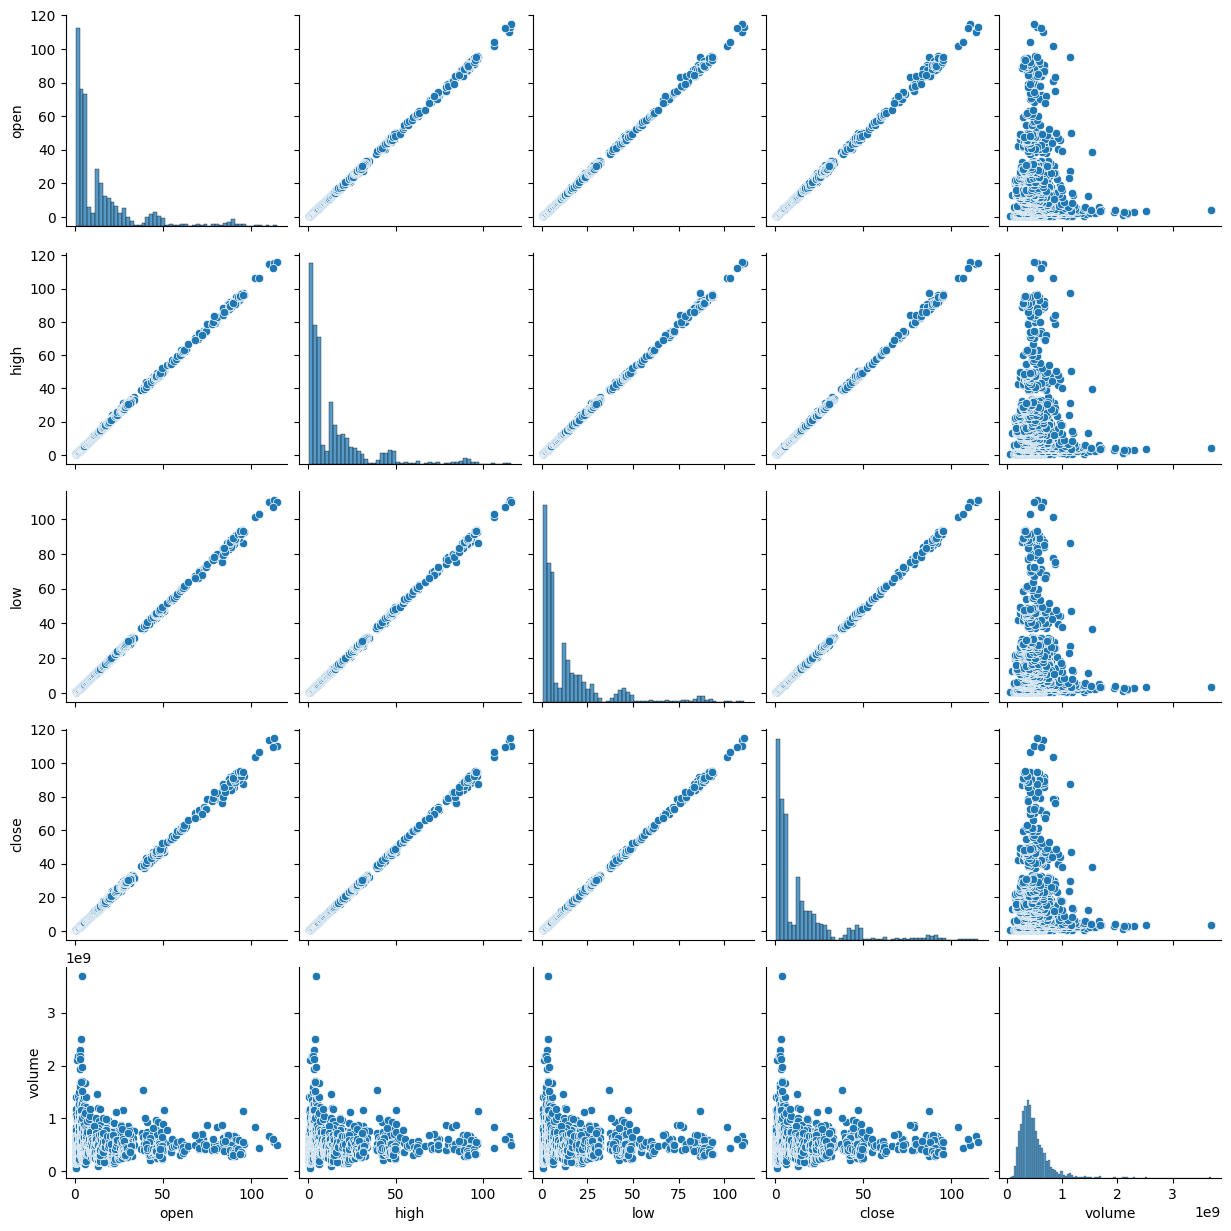

In [16]:
sns.pairplot(df)

**Dividindo os dados em teste e treinamento**

In [17]:
#Divindo o Dataset
X = df[['open','high','low','volume']].values #Variavel Independente
y=df['close'].values #Variavel Dependente

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Treinando o modelo**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import statsmodels.api as sm

In [21]:
regressor = LinearRegression()
model = regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

**Prevendo os valores**

In [22]:
predicted = regressor.predict(X_test)

In [23]:
#Valores verdadeiros x Preditos
dframe = pd.DataFrame(y_test, predicted)
dfr = pd.DataFrame({'Preco Verdadeiro':y_test, 'Preco Previsto':predicted})

print(dfr)

     Preco Verdadeiro  Preco Previsto
0           48.167999       47.972714
1            1.779000        1.782559
2            1.713000        1.713188
3            4.104250        4.118007
4            8.490750        8.386267
..                ...             ...
469         23.014000       22.993492
470          4.575000        4.584458
471          4.080750        4.070449
472          0.492250        0.479810
473          5.385000        5.355168

[474 rows x 2 columns]


**Avaliando o modelo**

In [24]:
import math
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,predicted))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,predicted))
print("Root Mean Squared Error:",math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.10523088451304786
Mean Squared Error: 0.04254133543320315
Root Mean Squared Error: 0.20625551006749648


In [27]:
x2 = abs(predicted-y_test)
y2 = 100 * (x2/y_test)
accuracy = 100 - np.mean(y2)
print("Accuracy:", round(accuracy,2),"%")

Accuracy: 99.11 %
